<a href="https://colab.research.google.com/github/juliuswiscmsba/MNIST-PyTorch/blob/main/MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn

print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


In [2]:
#Use gpu or cpu
if torch.cuda.is_available():
    device = 'cuda' 
else:
    device = 'cpu' 

In [3]:
# Transform to a PyTorch tensors and the normalize our values between -1 and +1
#if color image (0.5,0.5,0.5), (0.5,0.5,0.5) 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])

In [4]:
# Load our Training Data and specify what transform to use when loading
trainset = torchvision.datasets.MNIST('mnist', 
                                      train = True, 
                                      download = True,
                                      transform = transform)

# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.MNIST('mnist', 
                                     train = False,
                                     download = True,
                                     transform = transform)

In [5]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [6]:
trainset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

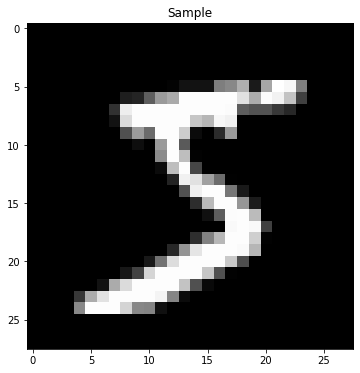

In [27]:
#Plot in OpenCV
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(title, image = None, size = 6):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

imgshow("Sample", trainset.data[0].numpy())

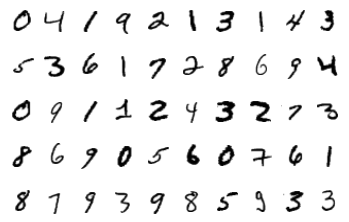

In [8]:
figure = plt.figure()
num_of_images = 50 

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')

In [9]:
#Data Loader is a function used to grab data in specifird batch sizes during training
#Prepare train and test loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True, num_workers=0)

In [10]:
trainloader

In [11]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [12]:
#Build NN Model
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()

      #First CNN Layer: 32 filters, 3*3 size, stride 1, padding 0
      self.conv1 = nn.Conv2d(1, 32, 3)
      #Second CNN Layer: 64 filters, 3*3 size, stride 1, padding 0
      self.conv2 = nn.Conv2d(32, 64, 3)
      #Third CNN Layer: 128 filters, 3*3 size, stride 1, padding 0
      self.conv3 = nn.Conv2d(64, 128,3)
      #Max Pool Layer 2*2 kernel of stride 2
      self.pool = nn.MaxPool2d(2,2)
      #First Fully Connected Layer 
      self.fc1 = nn.Linear(128*11*11, 128)
      #Second Fully Connected Layer 
      self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.relu(self.conv2(x))
      x = F.relu(self.conv3(x))
      x = self.pool(x)
      x = x.view(-1, 128*11*11)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)

      return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=15488, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
import torch.optim as optim

#Loss function
criterion = nn.CrossEntropyLoss()

#SGD
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [15]:
epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')

    #Keep adding or accumulating loss after each mini-batch in running_loss
    running_loss = 0.0

    #Each cycle 
    for i, data in enumerate(trainloader, 0):
        #data input = [inputs, labels]
        inputs, labels = data

        #Move to GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        #Gradients reset in each epoch
        optimizer.zero_grad()

        #Forward -> backprop + optimize
        outputs = net(inputs) #Forward Propafation
        loss = criterion(outputs, labels) #Get Loss
        loss.backward() #Back Propagation 
        optimizer.step() #Update gradients

        # Print Training statistics
        running_loss += loss.item()
        if i%50 == 49:
            correct = 0
            total = 0

            with torch.no_grad():
                #Testset to produce loss and accuracy
                for data in testloader:
                    images, labels = data
                    #Move to gpu
                    images = images.to(device)
                    labels = labels.to(device)

                    #Foward propagation
                    outputs = net(images)

                    #Get prediction
                    _, predicted = torch.max(outputs.data, dim = 1)
                    # Keep adding the label size or length to the total variable
                    total += labels.size(0)
                    # Keep a running total of the number of predictions predicted correctly
                    correct += (predicted == labels).sum().item()

                accuracy = 100* correct/total
                epoch_num = epoch + 1
                actual_loss = running_loss/50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0
    #Store
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.296, Test Accuracy = 20.920%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.260, Test Accuracy = 33.900%
Epoch: 1, Mini-Batches Completed: 150, Loss: 2.138, Test Accuracy = 52.960%
Epoch: 1, Mini-Batches Completed: 200, Loss: 1.355, Test Accuracy = 81.910%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.554, Test Accuracy = 85.910%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.526, Test Accuracy = 84.970%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.442, Test Accuracy = 85.950%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.395, Test Accuracy = 87.870%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.412, Test Accuracy = 88.760%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.376, Test Accuracy = 89.810%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.363, Test Accuracy = 90.640%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.344, Test Accuracy = 90.640%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.3

In [16]:
#Save model
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

Actual Label: 9, Predicted Label: 5


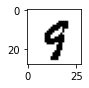

Actual Label: 9, Predicted Label: 5


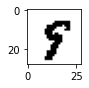

Actual Label: 7, Predicted Label: 3


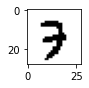

Actual Label: 7, Predicted Label: 9


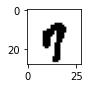

Actual Label: 8, Predicted Label: 3


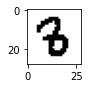

Actual Label: 8, Predicted Label: 9


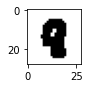

Actual Label: 4, Predicted Label: 7


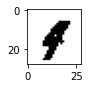

Actual Label: 4, Predicted Label: 2


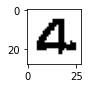

Actual Label: 9, Predicted Label: 1


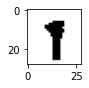

Actual Label: 8, Predicted Label: 7


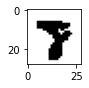

Actual Label: 8, Predicted Label: 9


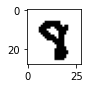

Actual Label: 2, Predicted Label: 3


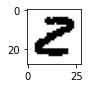

Actual Label: 0, Predicted Label: 8


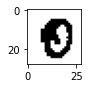

Actual Label: 6, Predicted Label: 4


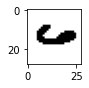

Actual Label: 5, Predicted Label: 8


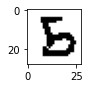

Actual Label: 0, Predicted Label: 5


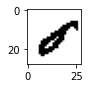

Actual Label: 9, Predicted Label: 5


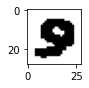

Actual Label: 7, Predicted Label: 1


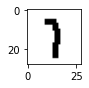

Actual Label: 8, Predicted Label: 6


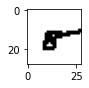

Actual Label: 9, Predicted Label: 7


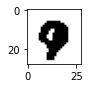

Actual Label: 4, Predicted Label: 6


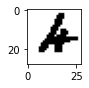

Actual Label: 4, Predicted Label: 2


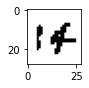

Actual Label: 0, Predicted Label: 6


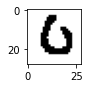

Actual Label: 2, Predicted Label: 0


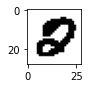

Actual Label: 5, Predicted Label: 3


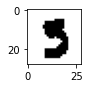

Actual Label: 9, Predicted Label: 0


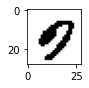

Actual Label: 2, Predicted Label: 3


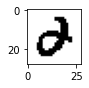

Actual Label: 6, Predicted Label: 0


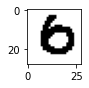

Actual Label: 4, Predicted Label: 9


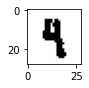

Actual Label: 9, Predicted Label: 8


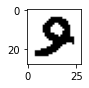

Actual Label: 4, Predicted Label: 6


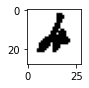

Actual Label: 9, Predicted Label: 1


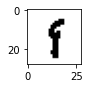

Actual Label: 7, Predicted Label: 2


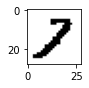

Actual Label: 9, Predicted Label: 0


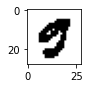

Actual Label: 2, Predicted Label: 3


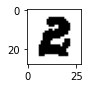

Actual Label: 1, Predicted Label: 8


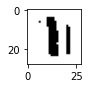

Actual Label: 6, Predicted Label: 0


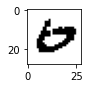

Actual Label: 8, Predicted Label: 7


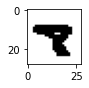

Actual Label: 1, Predicted Label: 8


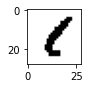

Actual Label: 3, Predicted Label: 5


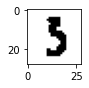

Actual Label: 9, Predicted Label: 3


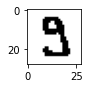

Actual Label: 8, Predicted Label: 3


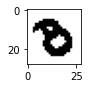

Actual Label: 7, Predicted Label: 1


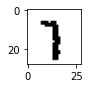

Actual Label: 7, Predicted Label: 2


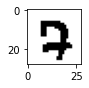

Actual Label: 9, Predicted Label: 0


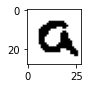

Actual Label: 7, Predicted Label: 3


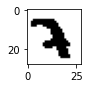

Actual Label: 3, Predicted Label: 2


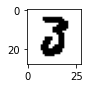

Actual Label: 9, Predicted Label: 5


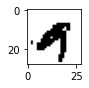

Actual Label: 1, Predicted Label: 6


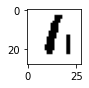

Actual Label: 9, Predicted Label: 4


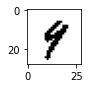

Actual Label: 6, Predicted Label: 8


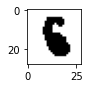

Actual Label: 5, Predicted Label: 3


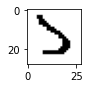

Actual Label: 4, Predicted Label: 9


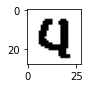

Actual Label: 4, Predicted Label: 0


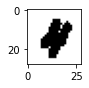

Actual Label: 7, Predicted Label: 1


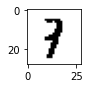

Actual Label: 0, Predicted Label: 7


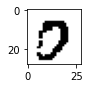

Actual Label: 9, Predicted Label: 3


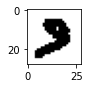

Actual Label: 6, Predicted Label: 0


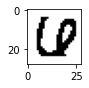

Actual Label: 8, Predicted Label: 0


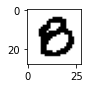

Actual Label: 4, Predicted Label: 0


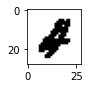

Actual Label: 7, Predicted Label: 2


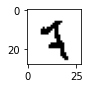

Actual Label: 0, Predicted Label: 8


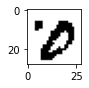

Actual Label: 3, Predicted Label: 8


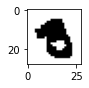

Actual Label: 8, Predicted Label: 5


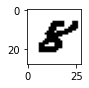

Actual Label: 9, Predicted Label: 0


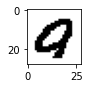

Actual Label: 4, Predicted Label: 9


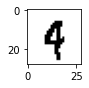

Actual Label: 7, Predicted Label: 8


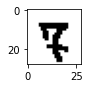

Actual Label: 6, Predicted Label: 5


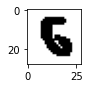

Actual Label: 9, Predicted Label: 1


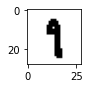

Actual Label: 1, Predicted Label: 3


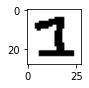

Actual Label: 8, Predicted Label: 0


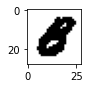

Actual Label: 3, Predicted Label: 5


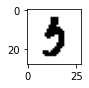

Actual Label: 3, Predicted Label: 5


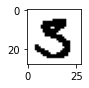

Actual Label: 8, Predicted Label: 2


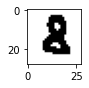

Actual Label: 2, Predicted Label: 8


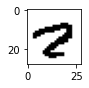

Actual Label: 8, Predicted Label: 4


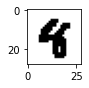

Actual Label: 9, Predicted Label: 5


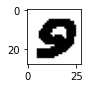

Actual Label: 7, Predicted Label: 9


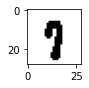

Actual Label: 7, Predicted Label: 2


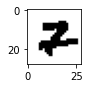

Actual Label: 4, Predicted Label: 7


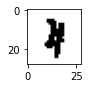

Actual Label: 9, Predicted Label: 7


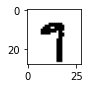

Actual Label: 6, Predicted Label: 8


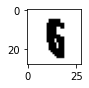

Actual Label: 2, Predicted Label: 1


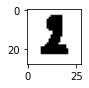

Actual Label: 9, Predicted Label: 5


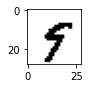

Actual Label: 3, Predicted Label: 8


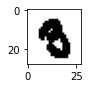

Actual Label: 2, Predicted Label: 7


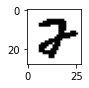

Actual Label: 9, Predicted Label: 3


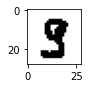

Actual Label: 6, Predicted Label: 0


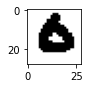

Actual Label: 9, Predicted Label: 4


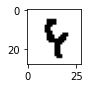

Actual Label: 6, Predicted Label: 5


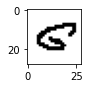

Actual Label: 9, Predicted Label: 5


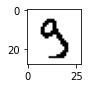

Actual Label: 1, Predicted Label: 5


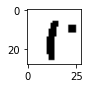

Actual Label: 4, Predicted Label: 6


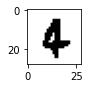

Actual Label: 2, Predicted Label: 0


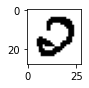

Actual Label: 3, Predicted Label: 8


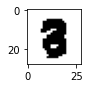

Actual Label: 8, Predicted Label: 2


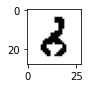

Actual Label: 9, Predicted Label: 1


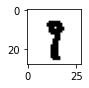

Actual Label: 9, Predicted Label: 5


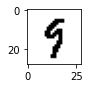

Actual Label: 5, Predicted Label: 6


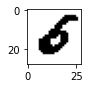

Actual Label: 0, Predicted Label: 6


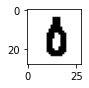

Actual Label: 4, Predicted Label: 9


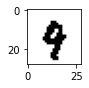

Actual Label: 9, Predicted Label: 7


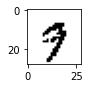

Actual Label: 7, Predicted Label: 2


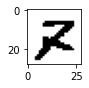

Actual Label: 2, Predicted Label: 4


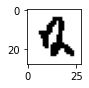

Actual Label: 4, Predicted Label: 0


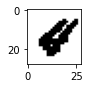

Actual Label: 2, Predicted Label: 8


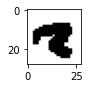

Actual Label: 1, Predicted Label: 8


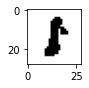

Actual Label: 9, Predicted Label: 1


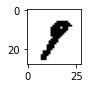

Actual Label: 8, Predicted Label: 0


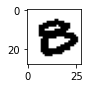

Actual Label: 6, Predicted Label: 8


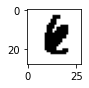

Actual Label: 9, Predicted Label: 5


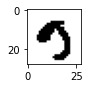

Actual Label: 8, Predicted Label: 1


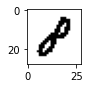

Actual Label: 0, Predicted Label: 5


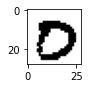

Actual Label: 0, Predicted Label: 6


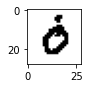

Actual Label: 3, Predicted Label: 2


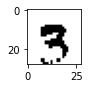

Actual Label: 8, Predicted Label: 0


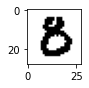

Actual Label: 3, Predicted Label: 5


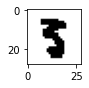

Actual Label: 5, Predicted Label: 0


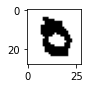

Actual Label: 4, Predicted Label: 8


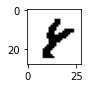

Actual Label: 7, Predicted Label: 2


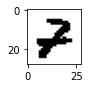

Actual Label: 8, Predicted Label: 0


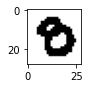

Actual Label: 3, Predicted Label: 7


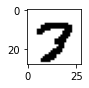

Actual Label: 2, Predicted Label: 7


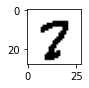

Actual Label: 9, Predicted Label: 7


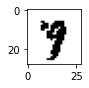

Actual Label: 9, Predicted Label: 3


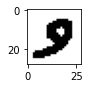

Actual Label: 4, Predicted Label: 9


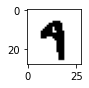

Actual Label: 7, Predicted Label: 0


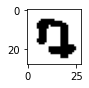

Actual Label: 4, Predicted Label: 8


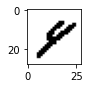

Actual Label: 6, Predicted Label: 1


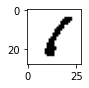

Actual Label: 0, Predicted Label: 6


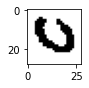

Actual Label: 7, Predicted Label: 3


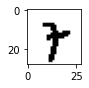

Actual Label: 9, Predicted Label: 5


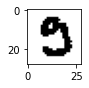

Actual Label: 9, Predicted Label: 1


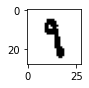

Actual Label: 5, Predicted Label: 6


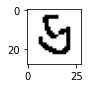

Actual Label: 1, Predicted Label: 6


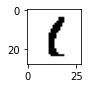

Actual Label: 2, Predicted Label: 8


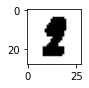

Actual Label: 6, Predicted Label: 5


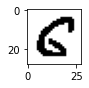

Actual Label: 9, Predicted Label: 4


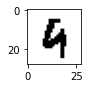

Actual Label: 4, Predicted Label: 7


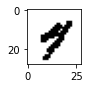

Actual Label: 4, Predicted Label: 6


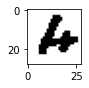

Actual Label: 2, Predicted Label: 7


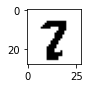

Actual Label: 7, Predicted Label: 2


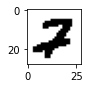

Actual Label: 5, Predicted Label: 7


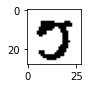

Actual Label: 9, Predicted Label: 4


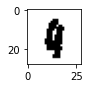

Actual Label: 7, Predicted Label: 3


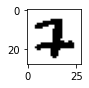

Actual Label: 4, Predicted Label: 6


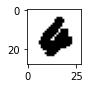

Actual Label: 4, Predicted Label: 9


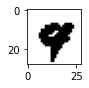

Actual Label: 1, Predicted Label: 6


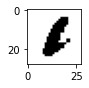

Actual Label: 1, Predicted Label: 6


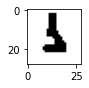

Actual Label: 7, Predicted Label: 2


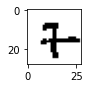

Actual Label: 9, Predicted Label: 5


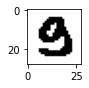

Actual Label: 9, Predicted Label: 0


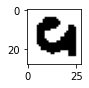

Actual Label: 7, Predicted Label: 2


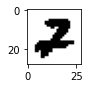

Actual Label: 7, Predicted Label: 9


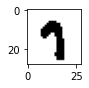

Actual Label: 7, Predicted Label: 1


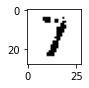

Actual Label: 1, Predicted Label: 8


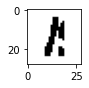

Actual Label: 2, Predicted Label: 7


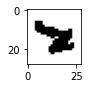

Actual Label: 9, Predicted Label: 7


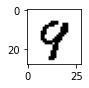

Actual Label: 4, Predicted Label: 9


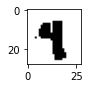

Actual Label: 1, Predicted Label: 2


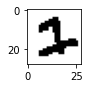

Actual Label: 4, Predicted Label: 6


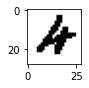

Actual Label: 4, Predicted Label: 9


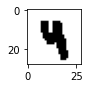

Actual Label: 7, Predicted Label: 0


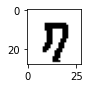

Actual Label: 8, Predicted Label: 0


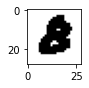

Actual Label: 3, Predicted Label: 8


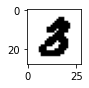

Actual Label: 8, Predicted Label: 5


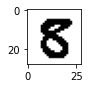

Actual Label: 7, Predicted Label: 2


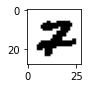

Actual Label: 6, Predicted Label: 1


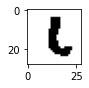

Actual Label: 1, Predicted Label: 2


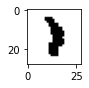

Actual Label: 9, Predicted Label: 8


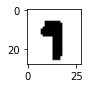

Actual Label: 1, Predicted Label: 2


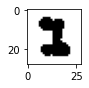

Actual Label: 7, Predicted Label: 3


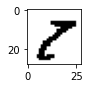

Actual Label: 5, Predicted Label: 0


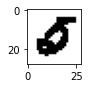

Actual Label: 3, Predicted Label: 5


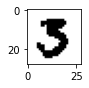

Actual Label: 7, Predicted Label: 2


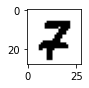

Actual Label: 9, Predicted Label: 7


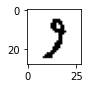

Actual Label: 7, Predicted Label: 2


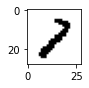

Actual Label: 9, Predicted Label: 1


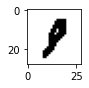

Actual Label: 0, Predicted Label: 2


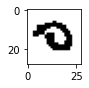

Actual Label: 8, Predicted Label: 2


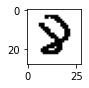

Actual Label: 7, Predicted Label: 2


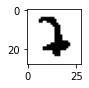

Actual Label: 5, Predicted Label: 6


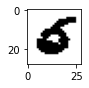

Actual Label: 4, Predicted Label: 7


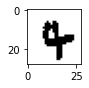

Actual Label: 6, Predicted Label: 0


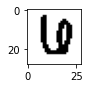

Actual Label: 3, Predicted Label: 2


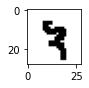

Actual Label: 4, Predicted Label: 9


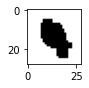

Actual Label: 9, Predicted Label: 8


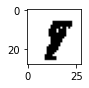

Actual Label: 7, Predicted Label: 9


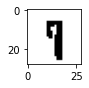

Actual Label: 4, Predicted Label: 6


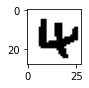

Actual Label: 2, Predicted Label: 0


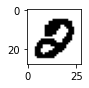

Actual Label: 8, Predicted Label: 5


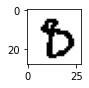

Actual Label: 7, Predicted Label: 3


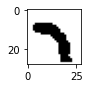

Actual Label: 8, Predicted Label: 6


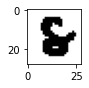

Actual Label: 2, Predicted Label: 0


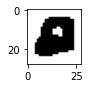

Actual Label: 3, Predicted Label: 5


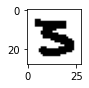

Actual Label: 8, Predicted Label: 3


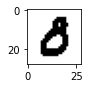

Actual Label: 9, Predicted Label: 3


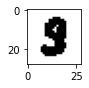

Actual Label: 0, Predicted Label: 6


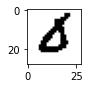

Actual Label: 4, Predicted Label: 9


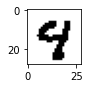

Actual Label: 7, Predicted Label: 9


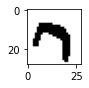

Actual Label: 4, Predicted Label: 6


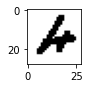

Actual Label: 9, Predicted Label: 4


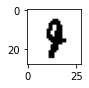

Actual Label: 7, Predicted Label: 2


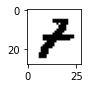

Actual Label: 9, Predicted Label: 4


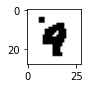

Actual Label: 4, Predicted Label: 9


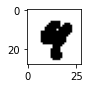

Actual Label: 9, Predicted Label: 5


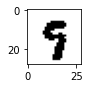

Actual Label: 9, Predicted Label: 8


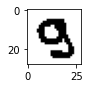

Actual Label: 9, Predicted Label: 1


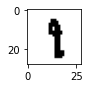

Actual Label: 6, Predicted Label: 5


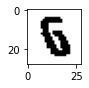

In [38]:
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)

        predictions = torch.argmax(outputs, dim=1)

        # Show misclassify image
        for i in range(len(labels)):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {label}, Predicted Label: {pred}')       
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), 1)

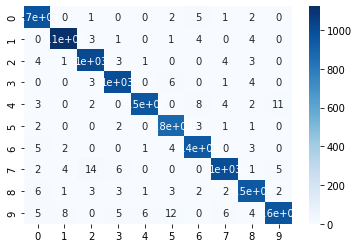

In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_list = []
label_list = []
with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)

        predictions = torch.argmax(outputs, dim=1)

        for i in range(len(labels)):
            pred_list.append(predictions[i].item())
            label_list.append(int(labels[i]))

sns.heatmap(confusion_matrix(label_list, pred_list), cmap = 'Blues', annot=True)